<a href="https://colab.research.google.com/github/Sairamstat/RSNA-abdominal-trauma-dectation/blob/main/RSNA_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nibabel

In [2]:
pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.4 MB/s eta 0:00:00


In [ ]:
pip install --user nibabel


In [ ]:
pip install --upgrade nibabel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: nibabel
    Found existing installation: nibabel 4.0.2
    Uninstalling nibabel-4.0.2:
      Successfully uninstalled nibabel-4.0.2


In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = nib.load('/content/397.nii')

In [ ]:
data = img.get_fdata()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_load = nib.load('/content/397.nii').get_fdata()
test_load.shape

(512, 512, 64)

In [ ]:
img

In [ ]:
import os

file_path = "/content/397.nii"
if not os.path.exists(file_path):
    print("The file does not exist.")


In [ ]:
/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"

NameError: ignored

In [ ]:
brew install python3

SyntaxError: ignored

In [ ]:
""" This code can be used to convert single/multiple NIfTI image files (.nii or .ni.gz) into .png images. Set the input file path and rotation angle to get the PNGs.
    base source code https://github.com/alexlaurence/NIfTI-Image-Converter"""

###########################################
# nii_to_pngs_converter.py for Python 3   #
#         NIfTI Image Converter           #
#                                         #
#     Written by Monjoy Saha              #
#        monjoybme@gmail.com              #
#          02 July 2020                   #
#                                         #
###########################################
#import scipy.misc
import numpy, shutil, os, nibabel
import sys, getopt
import argparse
import imageio

#############################################################
base_path=os.path.abspath(os.path.dirname("/content/137.nii"))
parser = argparse.ArgumentParser(description='Arguments for input and output files')
parser.add_argument('--input_path', type=str, default = base_path, help='Path of the input files')
parser.add_argument('--rotation_angle', type=int, default = 90, help='Rotation degree, i.e., 90°, 180°, 270°, default value is 90°')
args = parser.parse_args()
input_path = args.input_path
rotation_angle = args.rotation_angle
##############################################################
#get list of nii or nii.gz source files
source_files = os.listdir(input_path)
slice_counter = 0
#identify sample ids and get source ids
source_ids = [files[0:8] for files in source_files if files.endswith('.nii')]

sample_ids = list(set(source_ids))

for file in sample_ids:
    fname = os.path.basename(file)
    image_array = nibabel.load(fname+'.nii').get_data()
    print(len(image_array.shape))
    # set destination folder
    if not os.path.exists(base_path+'/'+fname):
        os.makedirs(base_path+'/'+fname)
        print("Created ouput directory: " + base_path+'/'+fname)

    # For 3D image inputted
    if len(image_array.shape) == 3:
        nx, ny, nz = image_array.shape
        total_slices = image_array.shape[2]
        # iterate through slices
        for current_slice in range(0, total_slices):
            # alternate slices
            if (slice_counter % 1) == 0:
                # rotate or no rotate
                if rotation_angle == 90:
                    data = numpy.rot90(image_array[:, :, current_slice])
                elif rotation_angle == 180:
                    data = numpy.rot90(numpy.rot90(image_array[:, :, current_slice]))
                elif rotation_angle == 270:
                    data = numpy.rot90(numpy.rot90(numpy.rot90(image_array[:, :, current_slice])))
                 #alternate slices and save as png
                if (slice_counter % 1) == 0:
                    print('Saving image...')
                    image_name = fname[:-4] + "_z" + "{:0>3}".format(str(current_slice+1))+ ".png"
                    imageio.imwrite(image_name, data)
                    print('Saved.')
                    #move images to folder
                    print('Moving image...')
                    src = image_name
                    shutil.move(src, base_path+'/'+fname)
                    slice_counter += 1
                    print('Moved.')
                    print('Finished converting images')
    elif len(image_array.shape) == 4:
        nx, ny, nz, nw = image_array.shape
        total_volumes = image_array.shape[3]
        total_slices = image_array.shape[2]
        for current_volume in range(0, total_volumes):
            # iterate through slices
            for current_slice in range(0, total_slices):
                if (slice_counter % 1) == 0:
                    if rotation_angle == 90:
                        data = numpy.rot90(image_array[:, :, current_slice, current_volume])
                    elif rotation_angle == 180:
                        data = numpy.rot90(numpy.rot90(image_array[:, :, current_slice, current_volume]))
                    elif rotation_angle == 270:
                        data = numpy.rot90(numpy.rot90(numpy.rot90(image_array[:, :, current_slice, current_volume])))

                    #alternate slices and save as png
                    if (slice_counter % 1) == 0:
                        print('Saving image...')
                        image_name = fname[:-4] + "_z" + "{:0>3}".format(str(current_slice+1))+ ".png"
                        imageio.imwrite(image_name, data)
                        print('Saved.')
                        #move images to folder
                        print('Moving image...')
                        src = image_name
                        shutil.move(src, base_path+'/'+fname)
                        slice_counter += 1
                        print('Moved.')
                        print('Finished converting images')


usage: ipykernel_launcher.py [-h] [--input_path INPUT_PATH]
                             [--rotation_angle ROTATION_ANGLE]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-4c8f79a3-6148-491e-8be8-51ad5b6807c9.json


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import os

# Specify the file path as a string
file_path = "/content/137.nii"

# Get the absolute path of the directory containing the file
base_path = os.path.abspath(os.path.dirname(file_path))

# Print the base path
print(base_path)


/content


In [ ]:
V = niftiread(/content/137.nii)
V = niftiread(headerfile,imgfile)
V = niftiread(info)

SyntaxError: ignored

In [ ]:
pip install pydicom


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00


In [ ]:
import pydicom


In [ ]:
# Specify the path to your .dcm file
dcm_file_path = "/content/30 (1).dcm"

# Read the DICOM file
ds = pydicom.dcmread(dcm_file_path)
ds

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.123.12345.1.2.3.63706.1.30
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.2.3.123456.4.5.1234.1.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.123.12345.1.2.3.63706.1.30
(0008, 0023) Content Date                        DA: '20230722'
(0008, 0033) Content Time                        TM: '005441.112500'
(0010, 0020) Patient ID                          LO: '63706'
(0018, 0050) Slice Thickness                     DS: '3.0'
(0018, 0060) KVP                                 DS: '130.0'
(0018, 5100) Patient Position                    CS: 'HFS'
(0020, 

In [ ]:
print("Patient's Name:", ds.High Bit)
print("Patient ID:", ds.Columns)


SyntaxError: ignored

In [ ]:
ds.BitsAllocated

16

In [ ]:
ds.PatientID

'63706'

In [ ]:
pixel_data = ds.pixel_array


In [ ]:
import pydicom

# Specify the path to your .dcm file
dcm_file_path = "path/to/your/file.dcm"

# Read the DICOM file
ds = pydicom.dcmread(dcm_file_path)

# Access patient information
print("Patient's Name:", ds.PatientName)
print("Patient ID:", ds.PatientID)

# Access and work with pixel data (if applicable)
if 'PixelData' in ds:
    pixel_data = ds.pixel_array
    print("Pixel Data Shape:", pixel_data.shape)


In [ ]:
import pandas as pd

# Specify the path to your .parquet file
parquet_file_path = "/content/test_dicom_tags.parquet"

# Read the .parquet file into a DataFrame
df = pd.read_parquet(parquet_file_path)

# Display the first few rows of the DataFrame
print(df.head())
df


FileNotFoundError: ignored

In [ ]:
import nibabel as nib

image = nib.load('/content/137[1].nii')

data = image.get_data()

print(data.shape)

image.close()


<ipython-input-22-18447bbaebe5>:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data = image.get_data()


OSError: ignored

In [ ]:
import SimpleITK as sitk

image = sitk.ReadImage('/content/397.nii')

# Do some image processing

sitk.WriteImage(image, '/content/397.nii')


In [ ]:
import os

current_working_directory = os.getcwd()


In [ ]:
image_path = os.path.join(current_working_directory, '137.nii')
output_path = os.path.join(current_working_directory, 'output.nii')


In [ ]:

output_path

'/content/output.nii'

In [ ]:
image_path = '/home/user/image.nii'
output_path = '/home/user/output.nii'


In [ ]:
image_path

'/home/user/image.nii'

In [ ]:
import SimpleITK as sitk

image = sitk.ReadImage('/content/397.nii')

# Do something with the image data

print(image.GetSize())


(512, 512, 64)


In [ ]:
image


<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7ca330a56fd0> >

In [ ]:
import skimage.color as color

image_data = color.rgb2gray(image_data)


ValueError: ignored

In [ ]:
import numpy as np

image_data = rgb2gray(image_data)


NameError: ignored

TypeError: ignored

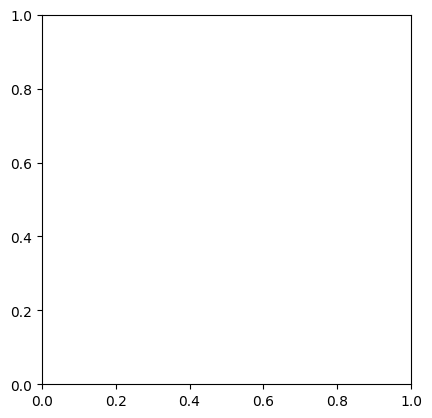

In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Read the .nii image
image = sitk.ReadImage('/content/397.nii')

# Get the image data as a NumPy array
image_data = sitk.GetArrayFromImage(image)

# Plot the image data
plt.imshow(image_data, cmap='gray')
plt.show()


In [ ]:
pip install pyvista

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 10.2 MB/s eta 0:00:00


In [ ]:
import pyvista as pv
import numpy as np
np.load('/content/397.nii', allow_pickle=True)


# Read the .nii file
image = np.load('/content/397.nii')

# Create a PyVista mesh
mesh = pv.Volume(image)

# Plot the mesh
pv.viewer.show(mesh)


UnpicklingError: ignored

In [ ]:
import pyvista as pv
import numpy as np

# Read the .nii file
image = np.load('/content/397.nii', allow_pickle=True)

# Create a PyVista mesh
mesh = pv.Volume(image)

# Plot the mesh
pv.viewer.show(mesh)


UnpicklingError: ignored

In [ ]:
import nibabel as nib

# Read the .nii file
image = nib.load('/content/397.nii')

# Get the image data
image_data = image.get_data()

# Do something with the image data



ExpiredDeprecationError: ignored

In [ ]:
import pyvista as pv
from vtk import vtkNIFTIImageReader
class NIFTIReader(pv.BaseReader):
    _class_reader = vtkNIFTIImageReader
reader = NIFTIReader('/content/397.nii')
mesh = reader.read()
mesh.plot()